In [42]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

In [43]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

/Users/naoki/.pyenv/versions/3.8.6/envs/ML2/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


KeyboardInterrupt: 

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

In [ ]:

from sklearn.datasets import load_boston
data_boston = load_boston()
data_boston

In [ ]:
x = data_boston.data
x

In [ ]:
y = data_boston.target.reshape(1,-1)
y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import RV_SGDAve
from ML2_lib import loss

In [ ]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.ones(13)
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()

In [ ]:
hoge = RV_SGDAve.RVSGD(loss_type=son,c=c)

In [ ]:
hoge.learn(k=8,w_init=w_init,x=x,y=y)

In [ ]:
exp_normal = RV_SGDAve.RVSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)
x,y = exp_normal.generate_dataset()

In [ ]:
x

In [ ]:
y


In [ ]:
hoge.learn(k=8,w_init=w_init,x=x,y=y)

In [36]:
from ML2_lib import algo_sgd
import numpy as np
from ML2_lib import RV_SGDAve
from ML2_lib import loss
son = loss.LinearQuadraticLoss()
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data_boston = load_boston()

In [17]:
x = data_boston.data
# x = x.T
x.shape


(506, 13)

In [18]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x = np.c_[x,np.ones(x.shape[0])]
w_init = np.zeros(x.shape[1]).reshape(1,-1)

In [39]:
y = data_boston.target.reshape(1,-1)
y = y.T
data = [x,y]
hoge = algo_sgd.SGD(w_init=w_init,a=0.04,data=data,t_max=500)

In [40]:
for i in hoge:
    hoge.update(model=son)

In [41]:
hoge.wstore

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[-0.36058112, -0.42139212, -0.5126812 , -0.23552516, -0.63958655,
          0.16785313,  0.31723179,  0.48138613, -0.74985048, -0.85305268,
         -0.26187334,  0.38106887, -0.42546761,  0.864     ]]),
 array([[-8.61410731e-01, -1.00668198e+00, -1.22476642e+00,
         -5.62656308e-01, -1.52793613e+00,  1.70717008e+00,
         -1.75487251e-03,  1.15000428e+00, -1.79135045e+00,
         -2.03789465e+00, -6.25600626e-01,  8.56799972e-01,
         -1.87599754e+00,  2.06404720e+00]]),
 array([[-1.16208688, -1.3585628 , -2.16764958, -0.7593301 , -2.13057482,
          2.44040971, -0.5860714 ,  1.92756725, -2.33456701, -2.8359321 ,
         -0.54405049,  1.15705219, -2.8583016 ,  2.78552493]]),
 array([[-1.38978239, -1.62779209, -2.88906362, -0.90980817, -2.59166271,
          3.11860051, -0.86824946,  2.52249232, -2.75019015, -3.4465225 ,
      

In [42]:
for i in range(500):

    print("i{} predict {} ,y {}".format(i,np.dot(x[i], hoge.w.T),y[i]))

i0 predict [19.27425499] ,y [24.]
i1 predict [17.70287597] ,y [21.6]
i2 predict [20.82759262] ,y [34.7]
i3 predict [21.28276636] ,y [33.4]
i4 predict [19.05995498] ,y [36.2]
i5 predict [20.09148346] ,y [28.7]
i6 predict [12.10037385] ,y [22.9]
i7 predict [5.53142232] ,y [27.1]
i8 predict [-2.14520049] ,y [16.5]
i9 predict [6.65507301] ,y [18.9]
i10 predict [3.72569994] ,y [15.]
i11 predict [10.18297088] ,y [18.9]
i12 predict [10.6199758] ,y [21.7]
i13 predict [22.35439974] ,y [20.4]
i14 predict [20.22743968] ,y [18.2]
i15 predict [22.7704511] ,y [19.9]
i16 predict [24.6569137] ,y [23.1]
i17 predict [17.45697146] ,y [17.5]
i18 predict [21.44804054] ,y [20.2]
i19 predict [21.36834179] ,y [18.2]
i20 predict [13.39517001] ,y [13.6]
i21 predict [18.30869334] ,y [19.6]
i22 predict [14.36719611] ,y [15.2]
i23 predict [13.60357428] ,y [14.5]
i24 predict [15.88694867] ,y [15.6]
i25 predict [15.59213832] ,y [13.9]
i26 predict [16.75539114] ,y [16.6]
i27 predict [14.28242545] ,y [14.8]
i28 predic

In [43]:
y[1]

array([21.6])

In [33]:

hoge.w

array([[-0.81257253, -1.44058168,  0.41335294,  2.13397153,  1.32235687,
        -0.51447843, -0.42464921, -2.59737618, -1.42759375, -0.18208428,
         1.64626509,  0.56035442, -5.62707839, 15.83094255]])

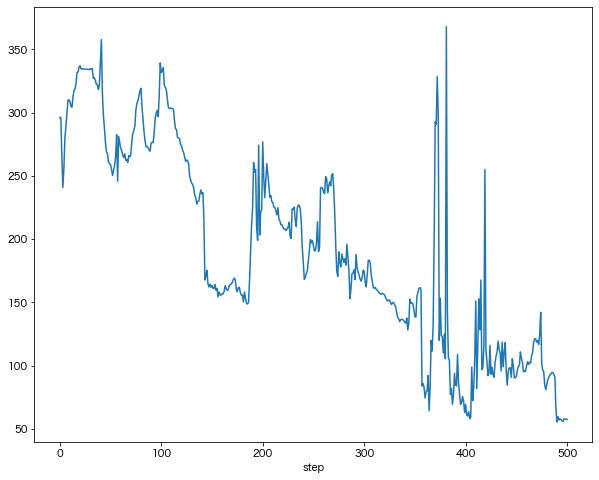

In [49]:
h = []
for i in hoge.wstore:
    h.append(np.mean(0.5 * ((y - np.dot(x, i.T)) ** 2),axis=0))

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(h)
ax1.set_xlabel("step")
plt.show()

In [46]:
print("i{} predict {} ,y {}".format(0,np.dot(x[0], hoge.w.T),y[0]))

i0 predict [19.27425499] ,y [24.]


In [50]:

from sklearn.linear_model import LinearRegression

# モデルの定義
reg_model = LinearRegression()
reg_model.fit(x, y)

LinearRegression()

In [52]:
reg_model.score(x, y)

0.7406426641094094

In [53]:
reg_model.coef_

array([[-0.92814606,  1.08156863,  0.1409    ,  0.68173972, -2.05671827,
         2.67423017,  0.01946607, -3.10404426,  2.66221764, -2.07678168,
        -2.06060666,  0.84926842, -3.74362713,  0.        ]])

In [54]:
reg_model.intercept_


array([22.53280632])